In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas import Series, DataFrame
import nltk

import spacy
import string

from gensim import corpora, models, similarities

import tensorflow as tf
import tensorflow_hub as hub

from gensim.models import Word2Vec

In [2]:
from google.colab import files 
uploaded = files.upload() 

Saving balanced_active_news.csv to balanced_active_news.csv


In [3]:
df = pd.read_csv('balanced_active_news.csv', usecols=['CONTENT','sentiment'])
df.head(10)
df['label']=df['sentiment']
df['label'].value_counts()

neutral     2170
negative    2170
positive    2170
Name: label, dtype: int64

In [4]:
for i, item in enumerate (df['label']):
  if item=='positive':
    df['label'][i]=2
  if item=='neutral':
    df['label'][i]=1
  if item=='negative':
    df['label'][i]=0
df['label'].value_counts()

2    2170
1    2170
0    2170
Name: label, dtype: int64

In [5]:
from google.colab import files 
uploaded = files.upload() 

Saving test.csv to test.csv


In [6]:
tdf = pd.read_csv('test.csv')
tdf

,CONTENT,label
0,mclean va oct 08 2019 globe newswire gladstone...,1
1,add detail background share sept 9 reuters fre...,0
2,acceleron pharma inc xlrn announce the discont...,0
3,corona ca accesswire october 3 2019 adomani in...,0
4,corona ca accesswire september 20 2019 adomani...,2
5,corona ca accesswire september 26 2019 adomani...,2
6,bloomberg tilman fertitta have to wait to land...,1
7,plan to resume trade on over the counter marke...,1
8,beijing may 23 2019 globe newswire chinacache ...,0
9,beijing aug 28 2019 globe newswire chinacache ...,1


In [0]:
x = df['CONTENT']
y = df['label']
x_test=tdf['CONTENT']
y_test=tdf['label']


In [8]:
corpus=df['CONTENT'].append(tdf['CONTENT'])
len(corpus)

6880

In [9]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=SEED)
print (x_train)
y_train.astype('int')
y_test.astype('int')
y_validation.astype('int')

6238    san antonio business wire company will host a ...
6448    overland park kan business wire waddell reed f...
3909    charlotte n c ap spx corp spxc on wednesday re...
2626    november 17 be the only deadline for velans co...
6386    want to participate in a short research study ...
3165    q3 2019 matador resources co earning call dall...
3318    alliance enables priority commercial payments ...
519     reuters california regulator say on monday -pr...
2940    what happen shares of xunlei nasdaq xnet rocke...
2903    on -pron- recent conference call with analyst ...
2508    revenue growth continues at the company compan...
3366    mr roosevelt be a co founder of friends of sau...
4642    smiths falls on oct 10 2019 cnw canopy growth ...
465     new york may 21 2019 globe newswire fluent inc...
5108    facebook s matchmak function be launch in the ...
4637    american express co axp be schedule to report ...
3095    new york oct 18 2019 prnewswire rosen law firm...
1118    pune i

2416    2
1821    0
1016    0
139     0
6211    1
37      0
816     0
5594    1
1552    0
749     0
7       0
3314    2
3271    2
2316    2
5824    1
6128    1
985     0
6009    1
2892    2
3469    2
2817    2
3905    2
296     0
5359    1
6332    1
6119    1
2042    0
2641    2
693     0
3738    2
       ..
2796    2
2041    0
5252    1
6316    1
4016    2
2474    2
5673    1
5111    1
3208    2
4558    1
3860    2
1714    0
1108    0
4746    1
5628    1
5625    1
5577    1
4616    1
3372    2
334     0
1667    0
3268    2
4758    1
5899    1
1838    0
1879    0
4696    1
5045    1
1467    0
5493    1
Name: label, Length: 1302, dtype: int64

In [10]:
len(x_train)

5208

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [0]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.33:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print "null accuracy: {0:.2f}%".format(null_accuracy*100)
    print "accuracy score: {0:.2f}%".format(accuracy*100)
    if accuracy > null_accuracy:
        print "model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100)
    elif accuracy == null_accuracy:
        print "model has the same accuracy with the null accuracy"
    else:
        print "model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100)
    print "train and test time: {0:.2f}s".format(train_test_time)
    print "-"*80
    return accuracy, train_test_time

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,66001,2000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train.astype('int'), x_validation, y_validation.astype('int'))
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [14]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS\n"
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 34.49%
accuracy score: 46.93%
model is 12.44% more accurate than null accuracy
train and test time: 9.90s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 47.93%
model is 13.44% more accurate than null accuracy
train and test time: 11.12s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 47.77%
model is 13.29% more accurate than null accuracy
train and test time: 11.79s
--------------------------------------------------------------------------------
Validation result for 8000 features
null accuracy: 34.49%
accuracy score: 48.00%
model is 13.52% more accurate than null accuracy
train and test time: 12.68s
--------------------------------------------------------------------------------
Validation result for 10000 features
null accuracy: 34.49%
accuracy score: 48.69%

In [15]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS\n"
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 34.49%
accuracy score: 46.01%
model is 11.52% more accurate than null accuracy
train and test time: 23.59s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 47.47%
model is 12.98% more accurate than null accuracy
train and test time: 26.30s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 49.39%
model is 14.90% more accurate than null accuracy
train and test time: 29.30s
---------------------------------------------------------------

In [16]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS\n"
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 34.49%
accuracy score: 46.08%
model is 11.60% more accurate than null accuracy
train and test time: 46.96s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 48.08%
model is 13.59% more accurate than null accuracy
train and test time: 52.96s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 49.46%
model is 14.98% more accurate than null accuracy
train and test time: 56.48s
--------------------------------------------------------------

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,66001,2000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print "\n"
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print "Validation result for {} features".format(n)
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train.astype('int'), x_validation, y_validation.astype('int'))
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [18]:
%%time
print "RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 34.49%
accuracy score: 48.85%
model is 14.36% more accurate than null accuracy
train and test time: 5.18s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 49.54%
model is 15.05% more accurate than null accuracy
train and test time: 5.20s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 50.54%
model is 16.05% more accurate than null accuracy
train and test time: 5.41s
---------------------------------------------------------

In [19]:
%%time
print "RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 34.49%
accuracy score: 46.93%
model is 12.44% more accurate than null accuracy
train and test time: 18.22s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 48.77%
model is 14.29% more accurate than null accuracy
train and test time: 18.47s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 49.77%
model is 15.28% more accurate than null accuracy
train and test time: 18.80s
-------------------------------------------------------

In [20]:
%%time
print "RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n"
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 34.49%
accuracy score: 47.08%
model is 12.60% more accurate than null accuracy
train and test time: 42.57s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 34.49%
accuracy score: 48.85%
model is 14.36% more accurate than null accuracy
train and test time: 45.06s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 34.49%
accuracy score: 48.69%
model is 14.21% more accurate than null accuracy
train and test time: 44.75s
------------------------------------------------------

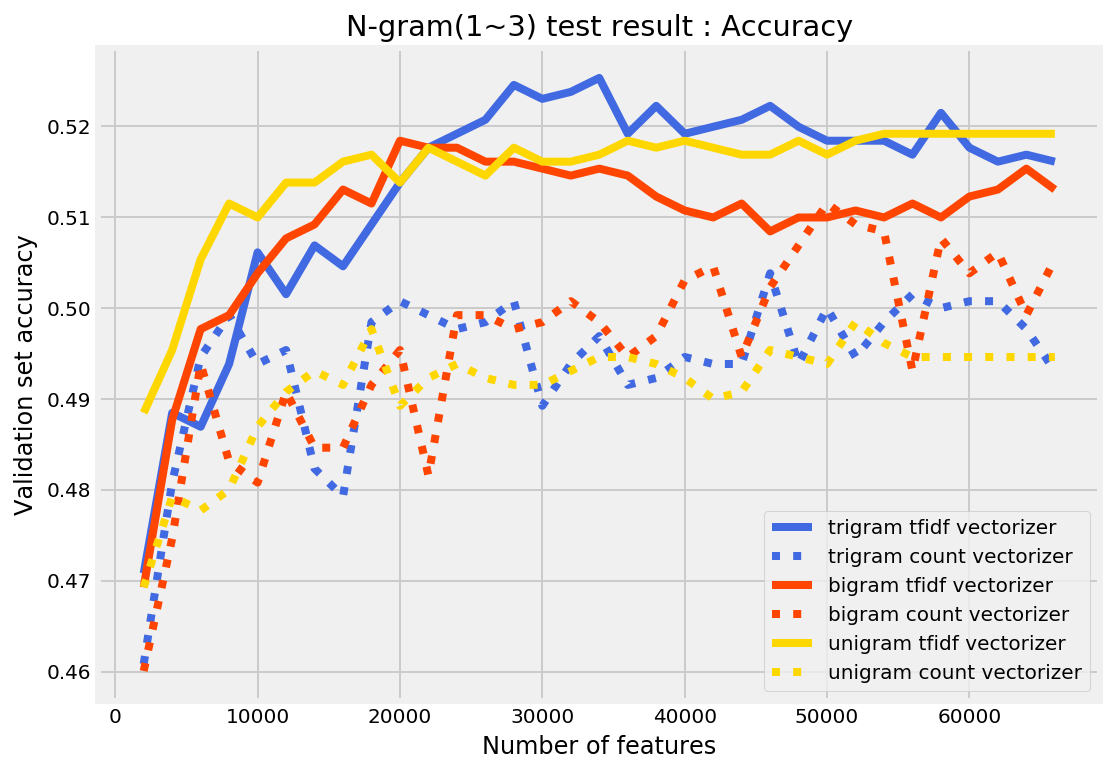

In [21]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

***From the above graph, we can see that when the number of features is about 24000,and the vectorizer is tfidf with the trigram, the accuracy is the best. ***

In [23]:
vectorizer = tvec.fit(corpus)
print (vectorizer.vocabulary_)
print (len(vectorizer.vocabulary_))

{u'the other thing': 57378, u'bode well': 12092, u'adjusted property ebitda': 4317, u'money be': 35501, u'money by': 35502, u'find in': 22824, u'q3 2018': 46674, u'q3 2019': 46675, u'company limited': 15784, u'pron focus on': 45077, u'the nine month': 57272, u'publication of': 46519, u'or hold pron': 40726, u'com cision more': 15219, u'net proceed from': 36489, u'80 percent': 3139, u'the interoute': 56846, u'materials inc nasdaq': 34328, u'revenue of approximately': 49167, u'trisha': 61848, u'ground': 25821, u'well to': 64019, u'and operating cost': 6829, u'canopy growth be': 13699, u'the company can': 55931, u'proud to be': 46341, u'appeal to': 7932, u'this market': 58911, u'inconsistent': 29595, u'pacific gas and': 41652, u'and edge': 6248, u'these matter': 58602, u'far in 2019': 22358, u'with': 64774, u'gaap measure to': 24842, u'operationally': 40430, u'slat to report': 51848, u'about how pron': 3554, u'as adjusted': 8282, u'00 eastern': 9, u'suffer damage': 53738, u'and vmware': 7

In [24]:
x_train_vec=x_train.tolist()
x_train_vec=vectorizer.transform(x_train_vec)
x_validation_vec=x_validation.tolist()
x_validation_vec=vectorizer.transform(x_validation_vec)
x_test_vec=x_test.tolist()
x_test_vec=vectorizer.transform(x_test_vec)
x_test_vec=x_test_vec.toarray()
x_train_vec=x_train_vec.toarray()
x_validation_vec=x_validation_vec.toarray()
x_train_vec

array([[0.06303074, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02308135, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

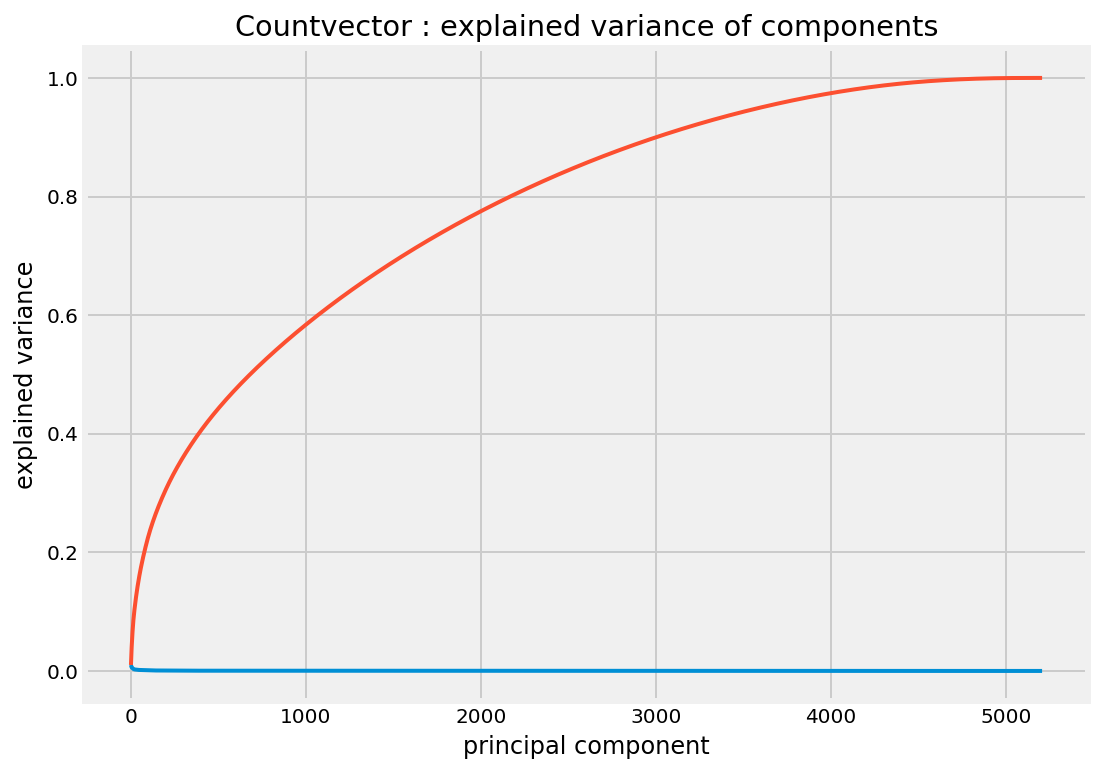

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x_train_std = scaler.fit_transform(x_train_vec)
x_val_std = scaler.fit_transform(x_validation_vec)
x_test_std=scaler.fit_transform(x_test_vec)
from sklearn.decomposition import PCA

x_pca_train = PCA().fit(x_train_std)
x_pca_val=PCA().fit(x_val_std)
x_pca_test=PCA().fit(x_test_std)
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, x_pca_train.n_components_+1)

ax.plot(x_values, x_pca_train.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(x_pca_train.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Tfidf : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

***In the above graph, the red line represents cumulative explained variance and the blue line represents explained the variance of each principal component. By looking at the graph above, even though the red line is not perfectly linear, but very close to a straight line. This means each of the principal components contributes to the variance explanation almost equally, and there’s not much point in reducing the dimensions based on PCA. This can also be seen from the blue line, which is very close to a straight line in the bottom.
It is a bit disappointing, that in our case, dimensionality reduction is not very helpful.**

In [0]:
model=lr.fit(x_train_vec,y_train.astype('int'))



In [27]:
y_val_pred = model.predict(x_validation_vec)

accuracy = accuracy_score(y_validation.astype('int'), y_val_pred)
print (accuracy)

0.5192012288786483


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn import svm

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid", 'SVM']
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid(),
    svm.SVC(gamma='scale', decision_function_shape='ovo')
    ]
zipped_clf = zip(names,classifiers)

In [0]:

def classifier_comparator(vectorizer=tvec, n_features=24000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print "Validation result for {}".format(n)
        print c
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train.astype('int'), x_validation, y_validation.astype('int'))
        result.append((n,clf_accuracy,tt_time))
    return result

In [31]:
%%time
trigram_result = classifier_comparator(n_features=24000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
null accuracy: 34.49%
accuracy score: 51.92%
model is 17.43% more accurate than null accuracy
train and test time: 48.45s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 34.49%
accuracy score: 52.15%
model is 17.67% more accurate than null accuracy
train and test time: 48.36s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 34.49%
accuracy score: 47.39%
model is 12.90% more accurate than null accuracy
train and test time: 46.51s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 34.49%
accuracy score: 50.77%
model is 16.28% more accurate than null accuracy
train and test time: 45.75s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 34.49%
accuracy score: 45.70%
model is 11.21% more accurate than null accuracy
train and test time: 46.74s
--------------------------------------------------------------------------------
Validation result for SVM
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
null accuracy: 34.49%
accuracy score: 52.84%
model is 18.36% more accurate than null accuracy
train and test time: 250.75s
--------------------------------------------------------------------------------
CPU times: user 12min 27s, sys: 2.26 s, 

In [32]:
from sklearn.ensemble import VotingClassifier

clf1 = RidgeClassifier()
clf2 = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf3 = LinearSVC()
clf5 = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))])
clf4 = LogisticRegression()

eclf = VotingClassifier(estimators=[('rc', clf1), ('svm', clf2), ('ls', clf3), ('lr', clf4), ('pl', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Ridgeclassifier', 'SVM', 'LinearSVC', 'LogisticRegression', 'pipeline', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=24000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print "Validation result for {}".format(label)
    print clf
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train.astype('int'), x_validation, y_validation.astype('int'))

Validation result for Ridgeclassifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
null accuracy: 34.49%
accuracy score: 53.00%
model is 18.51% more accurate than null accuracy
train and test time: 46.20s
--------------------------------------------------------------------------------
Validation result for SVM
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
null accuracy: 34.49%
accuracy score: 52.84%
model is 18.36% more accurate than null accuracy
train and test time: 247.36s
--------------------------------------------------------------------------------
Validation result for LinearSVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='